In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# New Section

In [5]:
file_path = "https://alt.qcri.org/semeval2016/task6/data/uploads/semeval2016-task6-trainingdata.txt"
df = pd.read_csv(file_path, delimiter='\t', encoding='ISO-8859-1')

In [6]:
df.head()

,ID,Target,Tweet,Stance
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST
4,105,Atheism,And stay in your houses and do not display you...,AGAINST


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2814 non-null   int64 
 1   Target  2814 non-null   object
 2   Tweet   2814 non-null   object
 3   Stance  2814 non-null   object
dtypes: int64(1), object(3)
memory usage: 88.1+ KB


In [8]:
df['Stance'].value_counts()

,count
Stance,
AGAINST,1342
NONE,741
FAVOR,731


In [9]:
df['Target'].value_counts()

,count
Target,
Feminist Movement,664
Hillary Clinton,639
Legalization of Abortion,603
Atheism,513
Climate Change is a Real Concern,395


In [10]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID        0
Target    0
Tweet     0
Stance    0
dtype: int64


<ipython-input-11-e42068ba8a7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Stance'], palette="Set2")


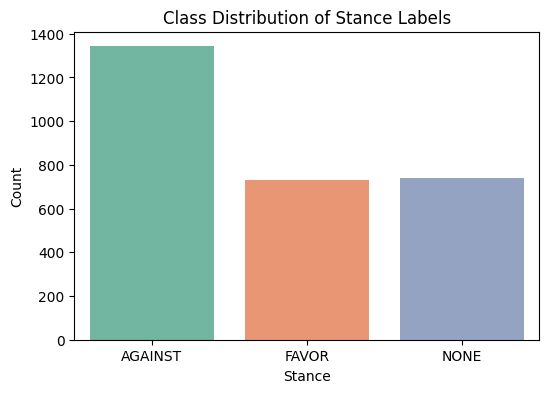

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Stance'], palette="Set2")
plt.title("Class Distribution of Stance Labels")
plt.xlabel("Stance")
plt.ylabel("Count")
plt.show()

In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['clean_tweet'] = df['Tweet'].apply(preprocess_text)

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_tweet']).toarray()

In [16]:
stance_mapping = {'AGAINST': 0, 'FAVOR': 1, 'NONE': 2}
y = df['Stance'].map(stance_mapping)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
y_pred_svm = svm_model.predict(X_test)

In [20]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6003552397868561

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.84      0.70       269
           1       0.64      0.35      0.45       146
           2       0.55      0.42      0.48       148

    accuracy                           0.60       563
   macro avg       0.60      0.53      0.54       563
weighted avg       0.60      0.60      0.58       563



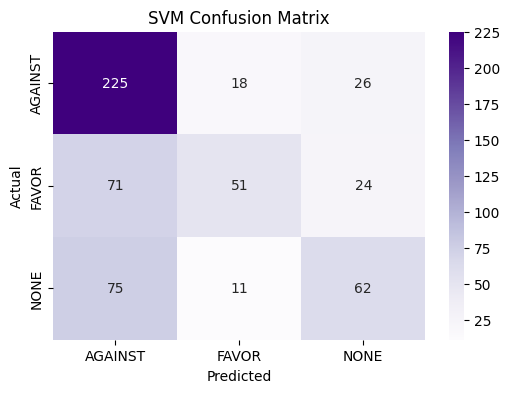

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Purples", xticklabels=stance_mapping.keys(), yticklabels=stance_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()